Ceci est la deuxième partie de la deuxième séance Ens'IA!
Ici nous (enfin vous surtout) allons recoder un **sigmoid neuron**.

In [1]:
#Quelques imports utiles pour la suite...
import math
from pylab import *
import matplotlib.pyplot as plt
from random import *

**Petit rappel**

La fonction *d'activation* sigmoid qu'on note ici $\sigma$ est
$$\sigma(x) = \frac{1}{1+e^{-x}}$$
et on a de plus $$\sigma'(x) = \sigma(x)(1-\sigma(x))$$
$$\\[0.2 cm]$$

La fonction de *loss* est la suivante :
$$L = \frac{1}{n}\sum_{i =1}^n(y_i - \hat{y}_i)^2$$

*$\rightarrow$Comment calculer $\frac{\partial L}{\partial \omega_i}$ avec l'entrée $k$?*

On note:  
$$
h_k = \sum_{i=1}^{n} a_{i}^{k}*w_{i} + b \\
y_k = \sigma(h_k)
$$

On a avec la règle de la chaîne
$$\frac{\partial L}{\partial \omega_i} = \frac{\partial L}{\partial y_k} \frac{\partial y_k}{\partial h_k}\frac{\partial h_k}{\partial w_i}$$

D'où
$$\frac{\partial L}{\partial \omega_i} = -2(y_k - \hat{y_k}) \sigma'(h_k)a_{i}^k$$

Pour simplifier les calculs lors de l'exécution de l'algorithme on notera:

$$\delta  = -2(y_k - \hat{y_k})\sigma'(h_k)$$



In [12]:
sigmoid = lambda x: 1/(1 + math.exp(-x))
assert(sigmoid(0)==0.5)
sigmoid_derivative = lambda x: sigmoid(x)*(1 - sigmoid(x))


In [13]:
class Neurone:

    """
    Création d'un perceptron
    Attributes:
        weights (list): liste de weights
        bias (int): le bias
    """
    
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def forward(self, entree):
        """Fonction appellée quand on veut obtenir la sortie à partir de l'entrée.

        Parameters:
            entree (list): les valeurs d'entrée

        """
        assert(len(entree) == len(self.weights))
        return sigmoid(sum([w*e for w, e in zip(self.weights, entree)]))

    def delta(self, predicted_output, expected_output, entree):
        """Calcule le delta montré dans les formules au dessus."""
        s = sum([w*e for w, e in zip(self.weights, entree)]) + self.bias
        ajout = sigmoid_derivative(s)
        return -2 * (expected_output - predicted_output) * ajout

    def backward(self, entree, delta):
        """Modifie les weights et les biais de le sens inverse de delta."""
        learning_rate = 0.1
        self.bias -= learning_rate * delta
        self.weights = [weight - learning_rate * delta * entree[index] for index, weight in enumerate(self.weights)]
            

    def accuracy(self, inputs, outputs):
        """Calcule l'accuracy du neurone.
        
        Parameters:
            inputs (list): liste de liste d'inputs
            outputs (list): liste de valeurs attendues en sortie
        """
        moyenne = 0
        for i in range(len(inputs)):
            moyenne += (round(self.forward(inputs[i])) == outputs[i])
        return moyenne / len(outputs) * 100
                       
    def predict(self, entree):
        """A partir de l'input, retourne la valeur prédite (0 ou 1)."""
        return int(round(self.forward(entree)))



Maintenant que vous avez programmé un **sigmoid neuron**, vous allez pouvoir l'utiliser! Essayons de permettre à ce neurone d'**apprendre** à reproduire le comportement d'une porte OR.
Cette fois-ci, plus besoin de chercher vous même les bons weights et biais. Ils vont être appris automatiquement.

In [14]:
#Exemple pour OR
neurone_or = Neurone([randint(0,10),randint(0,10)], randint(0,5)) #On crée un neurone donc les weights et biais sont initialisés de manière aléatoire
input_or = [[1,1], [1,0], [0,1], [0,0]] #liste des entrées possibles pour le neurone
output_or = [1, 1, 1, 0] #liste de sorties attendues

Maintenant que l'on a créé le neurone, il va falloir l'entraîner! Il va donc falloir faire une boucle qui entraine le neurone suffisamment pour qu'il puisse prédire toutes les sorties correctement. On apelle le nombre de fois que l'on va passer dans cette boucle, le nombre d'**epochs**. Une **epoch** correspond à un entrainement sur toutes les données. Faire 10 épochs revient donc à entrainer le neurone 10 fois sur les 4 données d'entrée.
Pour chaque epoch il faut:

1.   Faire passer les données dans le réseau de neurones
2.   Calculer la loss
3.   Backpropager la loss

Afin de pouvoir suivre l'évolution de notre neurone, calculez, à chaque fin de boucle l'accuracy et enregistrez la quelque part. Vous pourrez ainsi tracer un graphe pour voir si l'accuracy de votre neurone augmente bien au cours du temps.


In [19]:
#Training
accuracy = []
epochs_or = 2000 #trouver un bon nombre d'epochs
for j in range(epochs_or):
    #TODO - entrainement
    for i in range(4):
        outputvalue = neurone_or.forward(input_or[i])
        delta = neurone_or.delta(outputvalue, output_or[i], input_or[i])
        neurone_or.backward(input_or[i],delta)
    accuracy.append(neurone_or.accuracy(input_or,output_or))

    


Si vous en êtes là, c'est que normalement vous avez entraîné un neurone à reproduire une porte OR! Vérifiez par vous même les sorties.

In [20]:
for i in range(4):
    print("Prédit : "+str(neurone_or.predict(input_or[i]))+" Vrai résultat : "+str(output_or[i]))

Prédit : 1 Vrai résultat : 1
Prédit : 1 Vrai résultat : 1
Prédit : 1 Vrai résultat : 1
Prédit : 0 Vrai résultat : 0


A l'aide de *plt.plot*, tracez une jolie courbe pour voir comment l'accuracy de votre modèle a évolué au cours du temps.

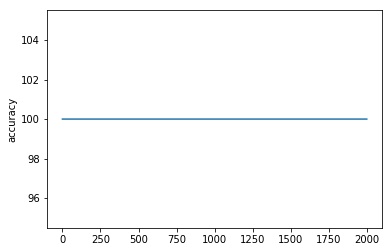

In [21]:
plt.plot(accuracy)
plt.ylabel("accuracy")
plt.show()


Pour comprendre ce que fait exactement notre petit neurone, on va tracer sa ligne de décision.

Cette ligne correspond au cas où $y = \frac{1}{2}$ où y représente l'output pour un ($x_2$, $x_1$).

$$ y = \frac{1}{2} \iff x_2w_2 + x_1w_1 + b = 0$$

En écrivant ensuite $x_2$ selon $x_1$ cela revient à 
$$x_2 = \frac{-x_1w_1 - b}{w_2}$$

Pour tracer cette ligne de decision on doit donc tracer $f$ où $$f(x) = \frac{-w_1x - b}{w_2}$$


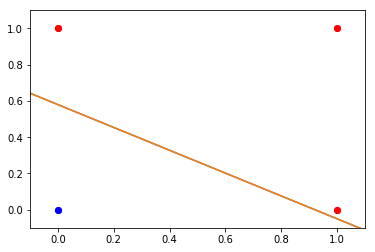

In [24]:
#On affiche les zones de décisions
x = linspace(-0.1, 1.1, 30)
#On trace f
y = -neurone_or.weights[0] / neurone_or.weights[1] * x - neurone_or.bias / neurone_or.weights[1]

plt.plot(x, y)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.scatter([0,1,1], [1,0,1], c = 'red')
plt.scatter([0], [0], c = 'blue')
plt.show()


Et si vous tentiez maintenant d'entraîner un *neuron sigmoid* à reproduire le comportement d'une porte XOR...?

In [25]:
#Exemple pour XOR 
neurone_xor = Neurone([randint(0,20),randint(0,20)], randint(-20,-15))
input_xor = [[1,1], [1,0], [0,1], [0,0]]
output_xor = [0, 1, 1, 0]

In [26]:
#TODO - Training
epochs_xor = 3000
accuracy_xor = []
for i in range(epochs_xor):
    accuracy_xor.append(neurone_xor.accuracy(input_xor, output_xor))
    #TODO
    for i in range(4):
        valeur_sorti = neurone_xor.forward(input_xor[i])
        delta = neurone_xor.delta(valeur_sorti, output_xor[i],input_xor[i])
        neurone_xor.backward(input_xor[i], delta)

In [27]:
for i in range(4):
    print("Prédit : "+str(neurone_xor.predict(input_or[i]))+" Vrai résultat : "+str(output_xor[i]))
  

Prédit : 1 Vrai résultat : 0
Prédit : 0 Vrai résultat : 1
Prédit : 1 Vrai résultat : 1
Prédit : 0 Vrai résultat : 0


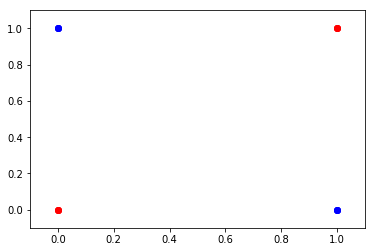

In [30]:
x = linspace(-0.1, 1.1, 30)
y = - neurone_xor.weights[0] / neurone_xor.weights[1] * x - neurone_xor.bias / neurone_xor.weights[1]
plt.plot(x, y)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.scatter([0,1], [0,1], c = 'red')
plt.scatter([0,1], [1,0], c = 'blue')
plt.show()

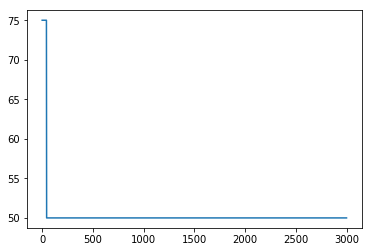

In [33]:
#TODO - accuracy
x = range(epochs_xor)
y = accuracy_xor
plt.plot(x, y)
plt.show()